In [ ]:
# 👉 Select “Python 3 (ipykernel)” as your kernel before running!

In [ ]:
# This is the dev branch

In [9]:
import os
# Assumes this notebook lives at the project root
project_root = os.getcwd()
print("Working in", project_root)


Working in /workspaces/AI


In [20]:
! ls

'=2.0'		     README.md	   data       env    notebooks	        tests
 AI.code-workspace   config.json   data_gen   eval   requirements.txt   train


In [19]:
## Install dependencies
! pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [18]:
# Run Unit Tests FIRST
! python -m unittest discover -s tests



..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


In [14]:
# Generate Training Data
!python data_gen/generate_data.py --tickers-file data_gen/tickers.txt --interval 5min --start 2022-01-01 --end 2024-02-01


Fetching NVDA from 2022-01-01 to 2024-02-01 (5 minute)...
Saved NVDA_5minute to data/NVDA_5minute.csv
Fetching NVDA from 2022-01-01 to 2024-02-01 (1 day)...
Saved NVDA_1day to data/NVDA_1day.csv
Fetching NVDA from 2022-01-01 to 2024-02-01 (1 week)...
Saved NVDA_1week to data/NVDA_1week.csv
Fetching AAPL from 2022-01-01 to 2024-02-01 (5 minute)...
Saved AAPL_5minute to data/AAPL_5minute.csv
Fetching AAPL from 2022-01-01 to 2024-02-01 (1 day)...
Saved AAPL_1day to data/AAPL_1day.csv
Fetching AAPL from 2022-01-01 to 2024-02-01 (1 week)...
Saved AAPL_1week to data/AAPL_1week.csv
Fetching MSFT from 2022-01-01 to 2024-02-01 (5 minute)...
Saved MSFT_5minute to data/MSFT_5minute.csv
Fetching MSFT from 2022-01-01 to 2024-02-01 (1 day)...
Saved MSFT_1day to data/MSFT_1day.csv
Fetching MSFT from 2022-01-01 to 2024-02-01 (1 week)...
Saved MSFT_1week to data/MSFT_1week.csv
Fetching AMZN from 2022-01-01 to 2024-02-01 (5 minute)...
Saved AMZN_5minute to data/AMZN_5minute.csv
Fetching AMZN from 2022-0

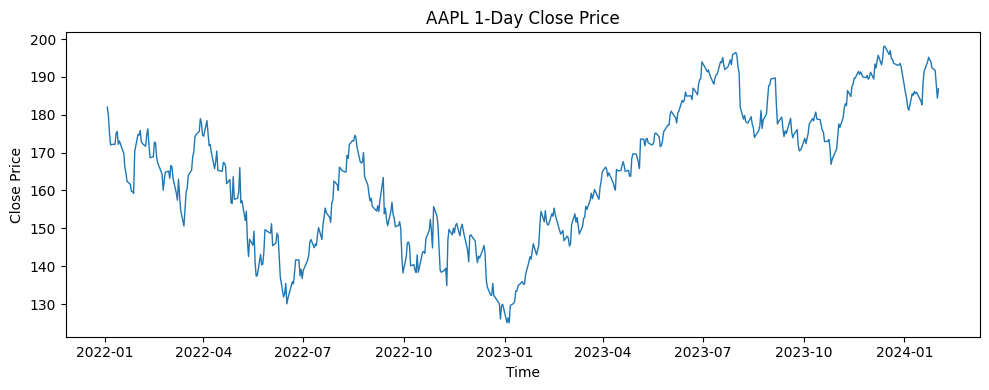

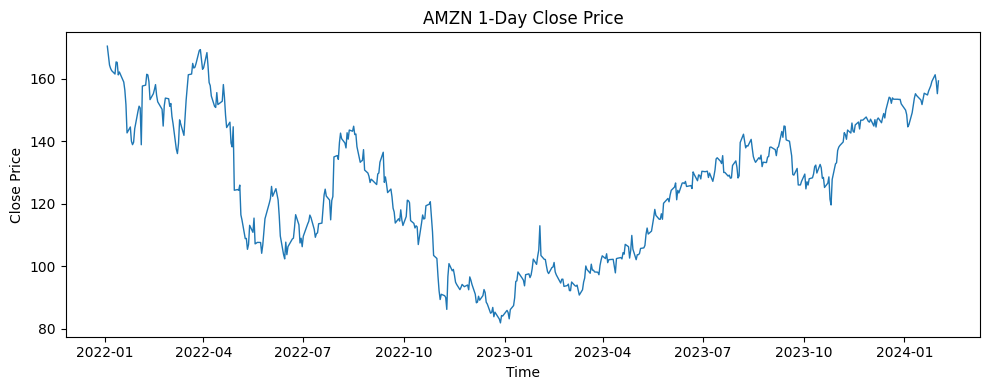

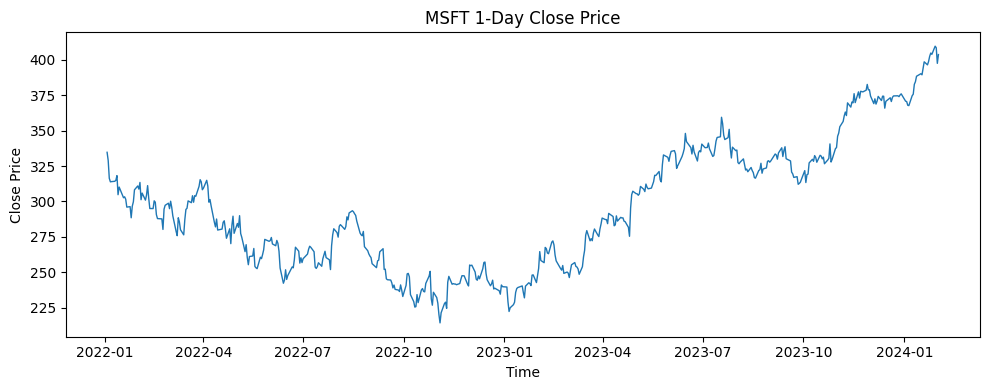

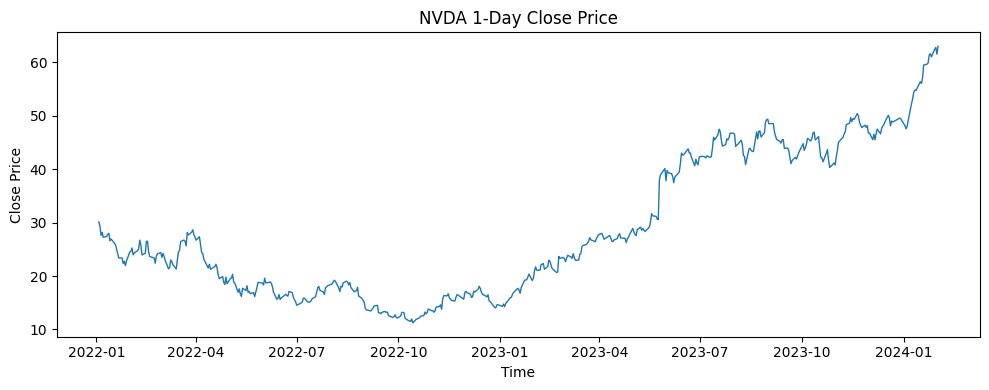

In [15]:
# ─── Plot all 1day CSVs in data/ ─────────────────────────────────────────
import glob
import pandas as pd
import matplotlib.pyplot as plt

# 1. Grab every CSV matching *_1day.csv
csv_files = glob.glob("data/*_1day.csv")
if not csv_files:
    raise FileNotFoundError("No files found: data/*_1day.csv")

# 2. Loop and plot
for file_path in sorted(csv_files):
    # Load and parse time
    df = pd.read_csv(file_path, parse_dates=[0])
    df.set_index(df.columns[0], inplace=True)

    # Extract ticker from filename
    ticker = file_path.split("/")[-1].split("_")[0]

    # Create the figure
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["close"], linewidth=1)
    plt.title(f"{ticker} 1-Day Close Price")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()
# ──────────────────────────────────────────────────────────────────────────


In [17]:
! pip install shimmy>=2.0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [25]:
! cd /workspaces/AI
! export PYTHONPATH=$PYTHONPATH:./env
! python train/train_ppo.py --config config.json --data-files data/NVDA_5min.csv --total-timesteps 2048


1241.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1246.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1251.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Traceback (most recent call last):
  File "/workspaces/AI/train/train_ppo.py", line 14, in <module>
    from trading_env import TradingEnv
ModuleNotFoundError: No module named 'trading_env'


In [24]:
! python train/train_ppo.py --config config.json --data-files data/NVDA_5min.csv --total-timesteps 2048


824.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Traceback (most recent call last):
  File "/workspaces/AI/train/train_ppo.py", line 14, in <module>
    from trading_env import TradingEnv
ModuleNotFoundError: No module named 'trading_env'
